In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('./data/groceries/box_builder_dataset/feature_frame.csv')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [244]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['order_date'] = pd.to_datetime(df['order_date'])

df.isnull().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

No row nulls in the data. 

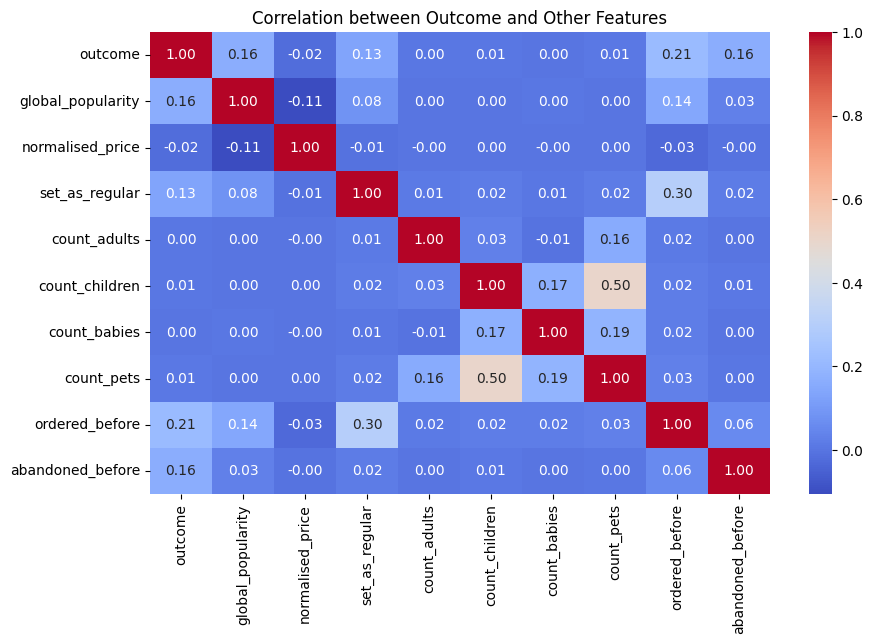

In [245]:
interesting_cols = ['outcome','global_popularity', 'normalised_price', 'set_as_regular', 'count_adults', 'count_children'
                , 'count_babies', 'count_pets', 'ordered_before', 'abandoned_before']

correlation_matrix = df[interesting_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Outcome and Other Features')
plt.show()

In [247]:
bought_products = df[df['outcome'] == 1]

info_per_order = bought_products.groupby('order_id').size()
info_per_order.describe()

count    3427.000000
mean        9.697111
std         6.789204
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        78.000000
dtype: float64

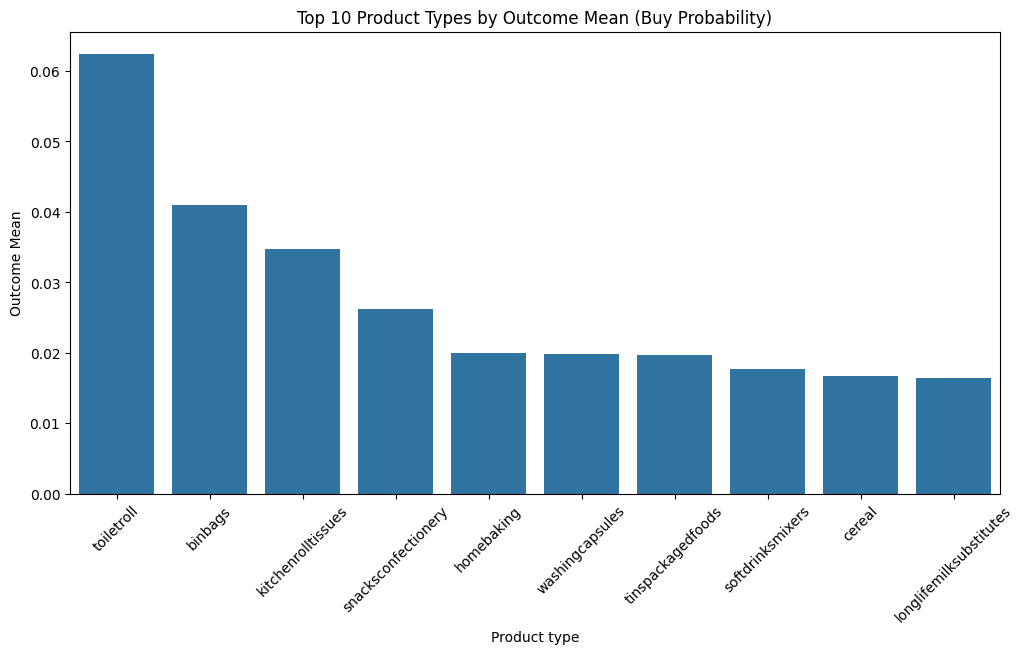

In [251]:
product_outcome_means = df.groupby('product_type')['outcome'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=product_outcome_means['product_type'], y=product_outcome_means['outcome'])
plt.title('Top 10 Product Types by Outcome Mean (Buy Probability)')
plt.xlabel('Product type')
plt.ylabel('Outcome Mean')
plt.xticks(rotation=45)
plt.show()

After calculating the 'Outcome' mean of each type_product, the number of times it is purchased with respect to the entire dataset, we can observe the probability of purchase for each type of product. With this information we can see that the products with the highest probability of purchase are staple products that everyone uses and that are purchased frequently, such as toilet rolls or bin bags.

Now let's try to observe the evolution over time of the most sold types of products, to see if any of them have a different trend or follow a different pattern of purchase depending on the date.

In [ ]:
top_product_types = bought_products['product_type'].value_counts().head(5).index

df_top_products = bought_products[bought_products['product_type'].isin(top_product_types)]
df_top_products['order_date'] = df_top_products['order_date'].dt.to_period('M').dt.to_timestamp()
df_grouped = df_top_products.groupby([df_top_products['order_date'], 'product_type']).size().reset_index(name='count')

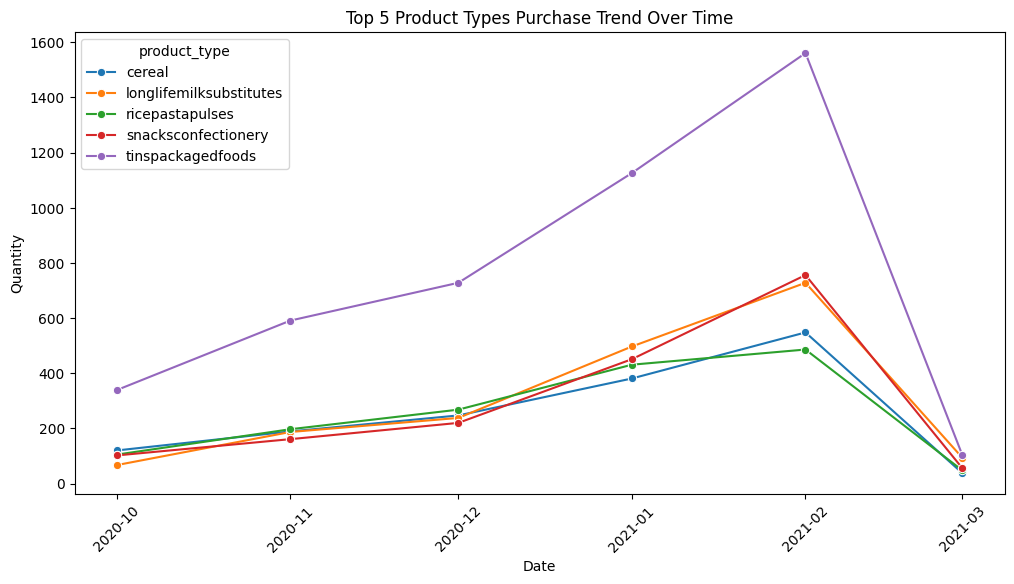

In [250]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='order_date', y='count',hue='product_type', marker='o')
plt.title('Top 5 Product Types Purchase Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

We can see that the products, in their magnitude, follow a very similar trend, so that no influence of time on the purchase pattern can be observed.
The drop in purchases in March 2021 is due to the lack of data for this month, as the latest data recorded is from 2021-03-03. 

Insights:
- 75 % of orders are smaller than 13 products.
- Previous experience with a product influences the purchase decision.
- Global popularity appears to be an influential factor when purchasing a product, meaning the marketing strategy is important.
- Variables such as set_as_regular and ordered_before show a significant correlation with each other, suggesting that the more a product is ordered, the more likely it is to be set as regular.
- Products with most probability the be bought are basics products that everyone uses and that are purchased frequently, such as toilet rolls or bin bags.
- There no clear influence of time on the purchase pattern of the most sold products. All of them follow a very similar trend.